In [1]:
import pandas as pd
from pathlib import Path
import re

loc = '/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series'
subs = []
subsToPath = dict()

for i in range(10,61):
    iloc = f'{loc}/{i}'
    print(iloc, '...', end='')
    for file in Path(iloc).iterdir():
        if file.is_dir():
            mtch = re.match('([0-9]+)_31016_2_0', file.name)
            if mtch:
                subs.append(int(mtch.group(1)))
                subsToPath[subs[-1]] = str(file)
    print('Done')

subs = sorted(subs)
print(len(subs))
print(subs[:10])

/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/10 ...Done
/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/11 ...Done
/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/12 ...Done
/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/13 ...Done
/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/14 ...Done
/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/15 ...Done
/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/16 ...Done
/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/17 ...Done
/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/18 ...Done
/run/media/anton/Elements/UKB/31016_downloaded/Bulk/Brain MRI/Functional time series/19 ...Done
/run/media/anton/Elements/UKB/31016_down

In [2]:
atlas_loc = '/run/media/anton/Elements/UKB/atlas-Glasser_dseg.tsv'

df_atlas = pd.read_csv(atlas_loc, sep='\t')
coms = set(df_atlas.values[:,3])
coms = sorted(list(coms))
roi2com = dict()
com2rois = dict()
for com in coms:
    com2rois[com] = []
for i in range(len(df_atlas.values)):
    roi = df_atlas.values[i,2]
    com = df_atlas.values[i,3]
    roi2com[roi] = com
    com2rois[com].append(roi)
i = 0
roi2idx = dict()
for com in coms:
    for roi in com2rois[com]:
        roi2idx[roi] = i
        i += 1
print(len(roi2idx))

360


In [4]:
import numpy as np
import warnings

def mat2vec(fc):
    a,b = np.triu_indices(360,1)
    return fc[a,b]

def vec2mat(vec):
    fc = np.zeros((360,360))
    a,b = np.triu_indices(360,1)
    fc[a,b] = vec
    fc += fc.T
    return fc

fcs = dict()
n = 0

for sub in subs:
    subloc = f'{subsToPath[sub]}/fMRI.Glasser.csv'
    try:
        df = pd.read_csv(subloc)
        rois = df.values[:,0]
        idx_rev = [None]*360
        for i in range(360):
            idx_rev[roi2idx[rois[i]]] = i
        ts = df.values[idx_rev,1:].astype('double')
        with warnings.catch_warnings(action="ignore"):
            fc = np.corrcoef(ts)
        fc = mat2vec(fc)
        if not np.any(np.isnan(fc)):
            fcs[sub] = fc
    except KeyboardInterrupt:
        print('Stopping...')
        break
    except:
        print('An exception occurred')
    n += 1
    if n % 50 == 0:
        print(f'Done {n}')

Done 50
Done 100
Done 150
Done 200
Done 250
Done 300
Done 350
Done 400
Done 450
Done 500
Done 550
Done 600
Done 650
Done 700
Done 750
Done 800
Done 850
Done 900
Done 950
Done 1000
Done 1050
Done 1100
Done 1150
Done 1200
Done 1250
Done 1300
Done 1350
Done 1400
Done 1450
Done 1500
Done 1550
Done 1600
Done 1650
An exception occurred
Done 1700
Done 1750
Done 1800
Done 1850
Done 1900
Done 1950
Done 2000
Done 2050
An exception occurred
Done 2100
Done 2150
Done 2200
Done 2250
Done 2300
Done 2350
Done 2400
Done 2450
Done 2500
Done 2550
Done 2600
An exception occurred
Done 2650
Done 2700
Done 2750
Done 2800
An exception occurred
Done 2850
Done 2900
An exception occurred
Done 2950
Done 3000
Done 3050
Done 3100
An exception occurred
Done 3150
Done 3200
Done 3250
Done 3300
Done 3350
Done 3400
An exception occurred
Done 3450
Done 3500
An exception occurred
Done 3550
An exception occurred
Done 3600
Done 3650
Done 3700
Done 3750
Done 3800
Done 3850
Done 3900
Done 3950
Done 4000
An exception occurred


In [5]:
goodsubs = sorted(list(fcs.keys()))
print(len(goodsubs))

38679


In [6]:
tot = 0
edges = [0]
for com in coms:
    n = len(com2rois[com])
    tot += n
    edges.append(tot)
print(coms)
print(edges)

['default mode', 'dorsal attention', 'frontoparietal', 'limbic', 'somatosensory', 'ventral attention', 'visual']
[0, 83, 131, 176, 204, 260, 306, 360]


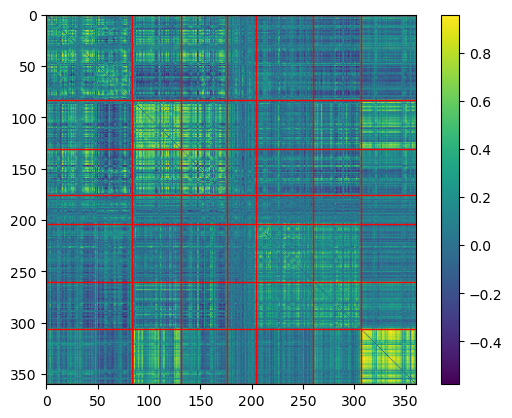

In [11]:
import matplotlib.pyplot as plt

fc = vec2mat(fcs[goodsubs[30225]])

plt.imshow(fc)
for e in edges:
    plt.plot([0,360],[e,e],color='red',linewidth=1)
    plt.plot([e,e],[0,360],color='red',linewidth=1)
plt.xlim([0,360])
plt.ylim([360,0])
plt.colorbar()
plt.show()

In [12]:
import pickle

output_loc = '/run/media/anton/Elements/UKB'

ploc = f'{output_loc}/fcs.pkl'

pickle.dump(fcs, open(ploc, 'wb'))

print('Done')

Done


In [13]:
# Write goodsubs to file

with open(f'{output_loc}/fcsubs.txt', 'w') as f:
    for sub in goodsubs:
        f.write(str(sub))
        f.write('\n')

print('Done')

Done
